# MGTF 495: Project Part 1
# Housing Sale Price Prediction

I'll be using a deep neural network (DNN) for the regression, implemented using the `keras` api of the `tensorflow` library.

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
plt.rc(group = "figure", figsize = (16, 9))
plt.rc(group = "font", size = 14)

Read data

In [3]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

Check the numbers of samples and features

In [4]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (2051, 81) 
The test data size before dropping Id feature is : (879, 80) 


Save the 'Id' column

In [5]:
train_ID = train['ID']
test_ID = test['ID']

Now drop the 'Id' colum since it's unnecessary for  the prediction process.

In [6]:
train.drop("ID", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

Check again the data size after dropping the 'Id' variable

In [7]:
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (2051, 80) 
The test data size after dropping Id feature is : (879, 79) 


In [8]:
def rmse(y_true, y_pred):
    """Root Mean Squared Error"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

Segregate features from labels in the training set

In [9]:
X_train = train.drop(columns = 'SalePrice')
y_train = train['SalePrice']

Features in the test set

In [10]:
X_test = test

## Preprocessing

In [11]:
X_train

,Paved Drive,BsmtExposure,BsmtUnfinishedArea,ProximityToMainRoad2,KitchenQuality,SaleCondition,LivingArea,Lot Config,FenceQuality,SaleType,...,GarageArea,BsmtFinish1Area,Quality,GarageType,LotSize,Kitchens,GarageYearBuilt,BuildingClass,2ndFloorArea,1stFloorArea
0,N,NaN,0,Norm,TA,Normal,845,CulDSac,NaN,WD,...,290.0,0,4,Detchd,11500,1,1957.0,20,0,1889
1,Y,No,928,Norm,TA,Normal,1329,Inside,NaN,WD,...,441.0,608,7,Attchd,12285,1,1960.0,20,252,2373
2,Y,No,2174,Norm,TA,Normal,1967,Inside,NaN,WD,...,580.0,0,5,Attchd,9662,2,1977.0,90,252,3011
3,Y,Gd,1701,Norm,Gd,Normal,1614,Inside,NaN,WD,...,576.0,120,7,Attchd,9316,1,2005.0,20,252,2658
4,Y,No,778,Norm,TA,Normal,1904,Inside,GdPrv,WD,...,240.0,244,5,Attchd,7200,1,1950.0,50,1020,2180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,Y,No,1262,Norm,Gd,Normal,1845,Inside,GdPrv,WD,...,462.0,0,6,Attchd,11218,1,1992.0,60,1042,2099
2047,Y,No,795,Norm,TA,Normal,2555,Inside,NaN,WD,...,672.0,0,6,Detchd,11526,1,1993.0,70,1000,2467
2048,Y,Gd,527,Norm,TA,Normal,1081,Inside,NaN,WD,...,401.0,761,6,CarPort,12929,1,1960.0,20,252,2125
2049,Y,No,413,Norm,TA,Normal,1167,Inside,NaN,WD,...,495.0,709,5,Detchd,8731,1,1972.0,30,252,2211


The feature space consists of both numerical and categorical columns. Since the two need to be treated differently, I'll divide the feature set for preprocessing.

In [12]:
X_train_numerical = X_train.select_dtypes(exclude = ['object'])
X_train_categorical = X_train.select_dtypes(include = ['object'])

Check the features in `X_train_numerical`

In [13]:
X_train_numerical.head().T

,0,1,2,3,4
BsmtUnfinishedArea,0.0,928.0,2174.0,1701.0,778.0
LivingArea,845.0,1329.0,1967.0,1614.0,1904.0
HalfBaths,0.0,1.0,0.0,0.0,1.0
LotFrontage,NaN,NaN,NaN,78.0,60.0
YearRemodelled,1957.0,1960.0,1977.0,2005.0,1982.0
MasVnrArea,0.0,128.0,0.0,140.0,0.0
EnclosedPorchArea,0.0,203.0,0.0,0.0,168.0
PoolSize,0.0,0.0,0.0,0.0,0.0
BsmtFullBaths,0.0,0.0,0.0,0.0,1.0
ScreenPorchArea,0.0,0.0,0.0,0.0,0.0


`MonthSold` has a numeric data type, but it's a categorical column. I'll convert it into month names and then move it to `X_train_categorical`.

In [14]:
import calendar
MonthSold = X_train_numerical.pop('MonthSold')
MonthSold = MonthSold.map({index: month for index, month in enumerate(calendar.month_abbr) if month})
X_train_categorical['MonthSold'] = MonthSold

Check the features in `X_train_categorical`

In [15]:
X_train_categorical.head().T

,0,1,2,3,4
Paved Drive,N,Y,Y,Y,Y
BsmtExposure,NaN,No,No,Gd,No
ProximityToMainRoad2,Norm,Norm,Norm,Norm,Norm
KitchenQuality,TA,TA,TA,Gd,TA
SaleCondition,Normal,Normal,Normal,Normal,Normal
Lot Config,CulDSac,Inside,Inside,Inside,Inside
FenceQuality,NaN,NaN,NaN,NaN,GdPrv
SaleType,WD,WD,WD,WD,WD
Neighborhood,Edwards,NAmes,Sawyer,CollgCr,NAmes
HeatingQuality,Ex,Gd,TA,Ex,Gd


Check for missing values in `X_train_numerical`

In [16]:
mask = X_train_numerical.isna().any()
mask

BsmtUnfinishedArea      False
LivingArea              False
HalfBaths               False
LotFrontage              True
YearRemodelled          False
MasVnrArea               True
EnclosedPorchArea       False
PoolSize                False
BsmtFullBaths           False
ScreenPorchArea         False
Misc                    False
TotalRooms              False
YearBuilt               False
YearSold                False
BsmtFinish2Area         False
OpenPorchArea           False
Fireplaces              False
TotalBsmtArea           False
SeasonPorchArea         False
LowQualityFinishArea    False
BsmtHalfBaths           False
WoodDeckArea            False
Bedrooms                False
FullBaths               False
OverallRating           False
GarageCars               True
GarageArea               True
BsmtFinish1Area         False
Quality                 False
LotSize                 False
Kitchens                False
GarageYearBuilt          True
BuildingClass           False
2ndFloorAr

Statistical profile of columns with missing values

In [17]:
X_train_numerical.loc[:, mask].describe()

,LotFrontage,MasVnrArea,GarageCars,GarageArea,GarageYearBuilt
count,1708.000000,2036.000000,2050.000000,2050.000000,1937.000000
mean,68.957260,98.312377,1.759512,471.782439,1977.805885
std,23.690049,175.675222,0.759659,217.014929,26.017467
min,21.000000,0.000000,0.000000,0.000000,1895.000000
25%,58.000000,0.000000,1.000000,319.000000,1960.000000
50%,67.500000,0.000000,2.000000,480.000000,1979.000000
75%,80.000000,158.750000,2.000000,576.000000,2002.000000
max,313.000000,1600.000000,5.000000,1488.000000,2207.000000


Except for `GarageYearBuilt`, I'll replace `NaN`s in all columns with zero. For `GarageYearBuilt`, I'll replace it with the corresponding value in `YearBuilt`.

In [18]:
X_train_numerical.GarageYearBuilt.fillna(X_train_numerical.YearBuilt, inplace = True)
X_train_numerical.fillna(0, inplace = True)

Check for missing values in `X_train_categorical`

In [19]:
mask = X_train_categorical.isna().any()
mask

Paved Drive             False
BsmtExposure             True
ProximityToMainRoad2    False
KitchenQuality          False
SaleCondition           False
Lot Config              False
FenceQuality             True
SaleType                False
Neighborhood            False
HeatingQuality          False
RoofMaterial            False
Exterior1               False
Foundation              False
HouseType               False
Misc Feature             True
GarageFinish             True
ExteriorQual            False
UtilitiesAvailable      False
HouseStyle              False
MasVnrType               True
FireplaceQuality         True
BsmtCondition            True
BsmtHeight               True
BsmtFinishType2          True
PoolQuality              True
RoofType                False
Functional              False
ExteriorCond            False
GarageCondition          True
Electrical               True
ProximityToMainRoad     False
GarageQuality            True
ZoningClass             False
TypeOfAlle

I'll replace `NaN`s in `X_train_categorical` with `'NA'`. But first let me make sure that such an entry doesn't already exist in any of the columns.

In [20]:
(X_train_categorical == 'NA').any()

Paved Drive             False
BsmtExposure            False
ProximityToMainRoad2    False
KitchenQuality          False
SaleCondition           False
Lot Config              False
FenceQuality            False
SaleType                False
Neighborhood            False
HeatingQuality          False
RoofMaterial            False
Exterior1               False
Foundation              False
HouseType               False
Misc Feature            False
GarageFinish            False
ExteriorQual            False
UtilitiesAvailable      False
HouseStyle              False
MasVnrType              False
FireplaceQuality        False
BsmtCondition           False
BsmtHeight              False
BsmtFinishType2         False
PoolQuality             False
RoofType                False
Functional              False
ExteriorCond            False
GarageCondition         False
Electrical              False
ProximityToMainRoad     False
GarageQuality           False
ZoningClass             False
TypeOfAlle

In [21]:
X_train_categorical.fillna('NA', inplace = True)

## Building the deep neural network

### Preprocessing layers

Again, numerical features need to be treated differently from categorical features.

Numerical columns have different scales and ranges. They need to be normalized since, within a neural network, the features are multiplied by the model weights, and so, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

In [22]:
X_train_numerical.agg(['mean', 'std'])

,BsmtUnfinishedArea,LivingArea,HalfBaths,LotFrontage,YearRemodelled,MasVnrArea,EnclosedPorchArea,PoolSize,BsmtFullBaths,ScreenPorchArea,...,GarageCars,GarageArea,BsmtFinish1Area,Quality,LotSize,Kitchens,GarageYearBuilt,BuildingClass,2ndFloorArea,1stFloorArea
mean,713.812287,1491.158459,0.375427,57.425158,1983.921502,97.593369,23.281326,1.682594,0.433447,15.856168,...,1.758654,471.552413,485.005851,6.062896,10149.16626,1.042418,1975.825451,56.969771,572.461726,2202.971234
std,468.128294,505.773176,0.502152,33.613581,21.038876,175.231761,61.154577,30.620943,0.530837,55.909712,...,0.760466,217.211942,482.990709,1.423305,8408.22880,0.211048,27.539750,42.241709,429.773669,390.303146


Function to return the layer that normalizes a single numerical feature

In [23]:
def get_normalization_layer(name, dataset):
    # Create a Normalization layer for the feature
    normalizer = tf.keras.layers.Normalization(axis=None)

    # Get the feature from the `dataset`
    feature_ds = dataset[name].to_numpy()

    # Learn the statistics of the feature
    normalizer.adapt(feature_ds)

    return normalizer

Categorical features are one-hot encoded, which is the equivalent of creating dummy variables in a linear regression.

In [24]:
def get_category_encoding_layer(name, dataset):
    # Create a layer that turns strings into integer indices
    index = tf.keras.layers.StringLookup()

    # Get the feature from the `dataset`
    feature_ds = dataset[name].to_numpy()

    # Learn the set of possible values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Encode the integer indices
    encoder = tf.keras.layers.CategoryEncoding(num_tokens=index.vocabulary_size(), output_mode='one_hot')

    # Apply the one-hot encoding to the indices. The lambda function captures the layer.
    return lambda feature: encoder(index(feature))

Normalizing the numerical features

In [25]:
all_inputs = [] # to hold the input features
engineered_features = [] # to hold the normalized features

for header in list(X_train_numerical.columns):
    numeric_col = tf.keras.Input(shape = (1, ), name = header) # Create an input pipeline for the feature
    normalization_layer = get_normalization_layer(header, X_train_numerical) # Get the normalization layer for the feature
    normalized_numeric_col = normalization_layer(numeric_col) # Normalize the feature
    all_inputs.append(numeric_col) # collect input feature
    engineered_features.append(normalized_numeric_col) # collect normalized feature

One-hot encoding the categorical features

In [26]:
for header in list(X_train_categorical.columns):
    categorical_col = tf.keras.Input(shape = (1, ), name = header, dtype = 'string') # Create an input pipeline for the feature
    encoding_layer = get_category_encoding_layer(header, X_train_categorical) # Get the encoding layer for the feature
    encoded_categorical_col = encoding_layer(categorical_col) # Encode the feature
    all_inputs.append(categorical_col) # collect input feature
    engineered_features.append(encoded_categorical_col) # collect encoded feature

Concatenate the processed numerical and categorical features

In [27]:
all_features = tf.keras.layers.concatenate(engineered_features)

### Create and compile the model

The model consists of:
1. the preprocessing layers &mdash; normalization for numerical features and one-hot encoding for categorical,
2. two hidden, non-linear, `Dense` layers with the ReLU activation function, and
3. a linear `Dense` single-output layer.

In [28]:
# The preprocessing layers are not included in the sequential model here because
    # preprocessing is non-linear until the separately engineered features are concatenated back together. Instead,
    # the sequential `dnn_model` is applied directly to the concatenated features.
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Run `dnn_model` on processed features to get the output 
output = dnn_model(all_features)

# The encapsulating model that takes input (instead of processed) features and returns the output
model = tf.keras.Model(all_inputs, output)

# Model configuration
model.compile(loss = 'mean_squared_error', # loss function to use
              optimizer = tf.keras.optimizers.Adam()) # optimize using the Adam algorithm for training deep learning models

The following provides a visualization of the model

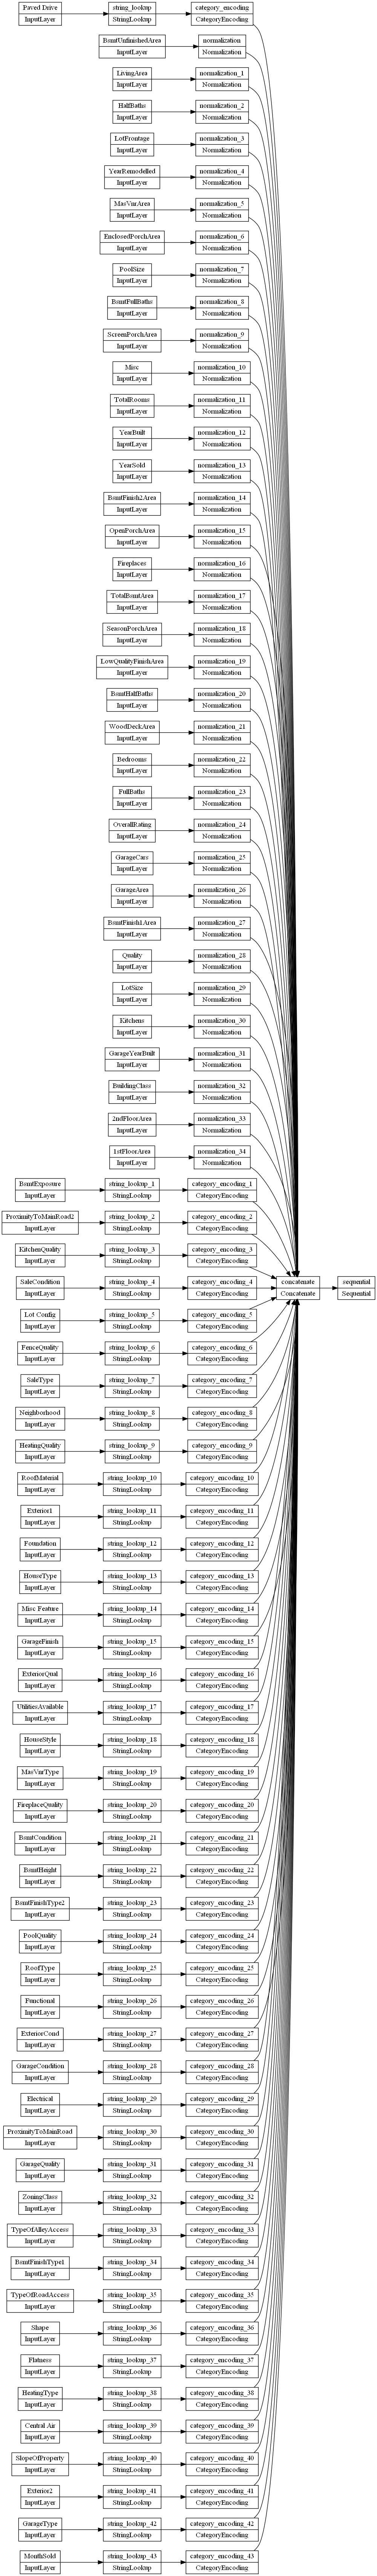

In [29]:
tf.keras.utils.plot_model(model, rankdir = "LR")

In [30]:
weights = model.get_weights() # save weight initializations to be able to reset the model later

### Train the model

Keras models don't automatically convert Pandas DataFrames, so we need to convert the data frame of training features into a dictionary of tensors before we can train the model.

In [31]:
# Features dictionary
features_dict = {name: np.array(value) 
                 for name, value in pd.concat([X_train_numerical, X_train_categorical], axis = 1).items()}

# Train the model
history = model.fit(features_dict, # training features
                    y_train.to_numpy(), # training labels
                    verbose = 0, # suppress logging
                    validation_split = 0.2, # calculate validation results on 20% of the training data
                    epochs = 100) # number of iterations for learning

Visualize model progress by plotting losses

(20666.20851957688, 80000.0)

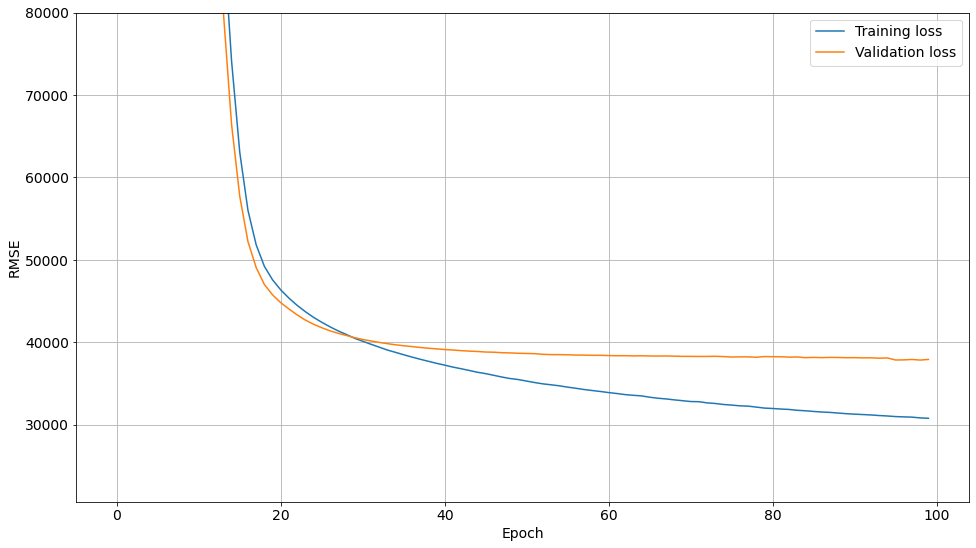

In [32]:
def plot_loss(history):
    plt.plot(history.epoch, np.sqrt(history.history['loss']), label = 'Training loss')
    plt.plot(history.epoch, np.sqrt(history.history['val_loss']), label = 'Validation loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.grid()

plot_loss(history)
bottom, top = plt.ylim()
plt.ylim(top = 80000)

As can be seen, training loss was decreasing steadily before we reached the 100th epoch. Validation losses were also decreasing, but at a much slower rate. So, perhaps, we could do better by increasing the number of epochs. 

In [33]:
history_temp = model.fit(features_dict,
                         y_train.to_numpy(),
                         verbose = 0,
                         validation_split = 0.2,
                         initial_epoch = 101, # continue learning
                         epochs = 200)

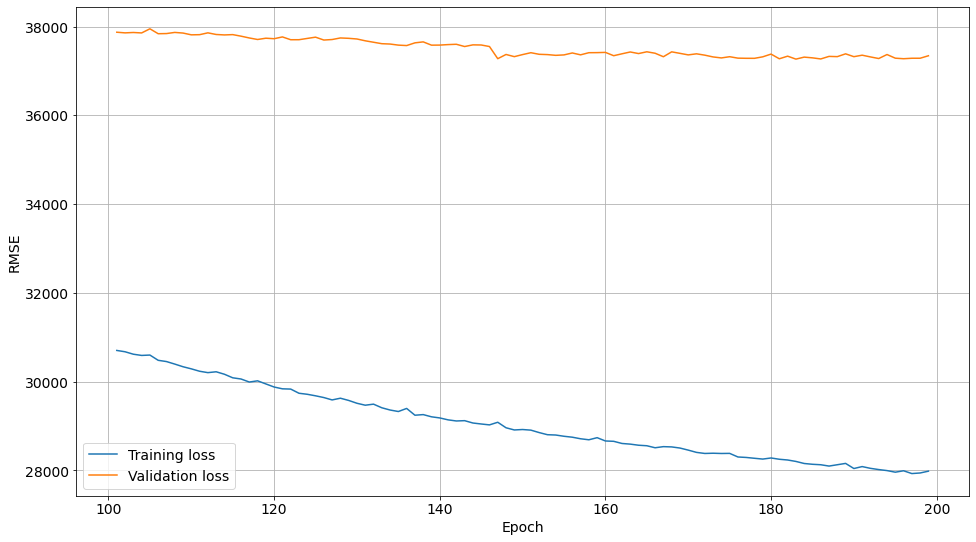

In [34]:
plot_loss(history_temp)

Losses are still decreasing. Let's see if we can do better still.

In [35]:
history_temp = model.fit(features_dict,
                         y_train.to_numpy(),
                         verbose = 0,
                         validation_split = 0.2,
                         initial_epoch = 201, # continue learning
                         epochs = 300)

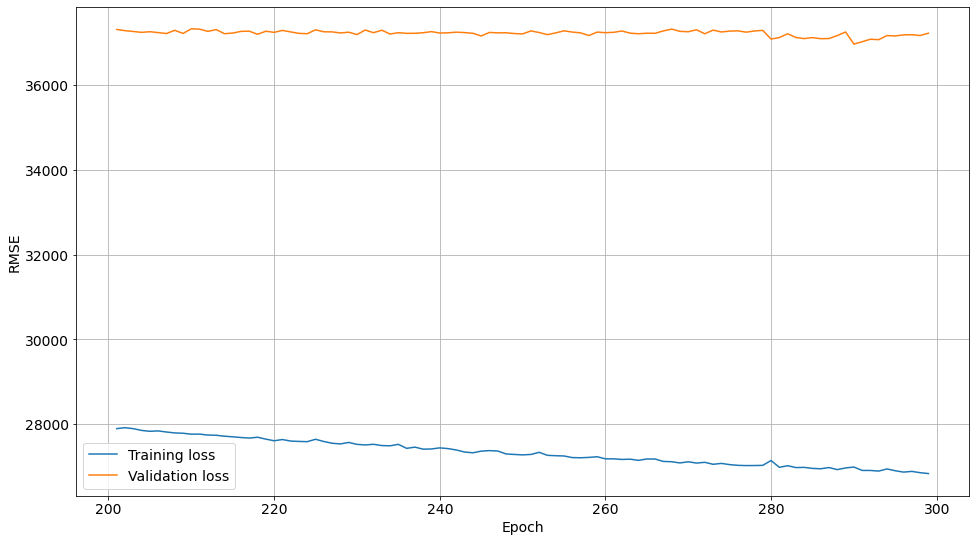

In [36]:
plot_loss(history_temp)

Validation losses have stagnated, and training losses are beginning to stagnate. So, the ideal number of epochs to use is 200.

In [37]:
model.set_weights(weights) # reset model

history = model.fit(features_dict,
                    y_train.to_numpy(),
                    verbose = 0,
                    validation_split = 0.2,
                    epochs = 200)

(17407.53595300749, 80000.0)

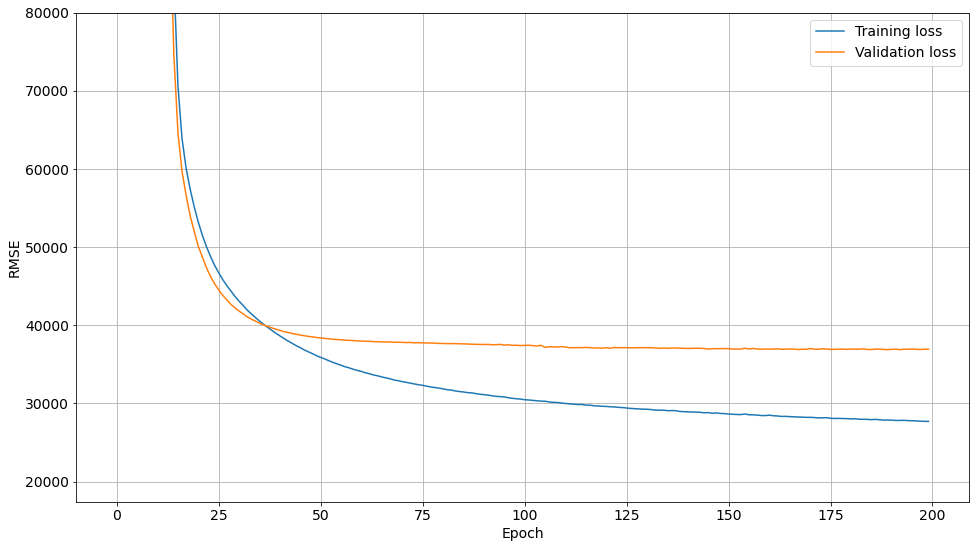

In [38]:
plot_loss(history)
bottom, top = plt.ylim()
plt.ylim(top = 80000)

Root mean squared error from training and validation

In [39]:
{'Training RMSE': np.sqrt(history.history['loss'][-1]), 'Validation RMSE': np.sqrt(history.history['val_loss'][-1])}

{'Training RMSE': 27694.1154760357, 'Validation RMSE': 36928.251298971634}

### Predict `SalePrice` from test features

First, we need to do the same preprocessing that we did on training features

In [40]:
# Transform the `MonthSold` column from integer index into month names
X_test['MonthSold'] = X_test['MonthSold'].map({index: month for index, month in enumerate(calendar.month_abbr) if month})

# Replace NaNs in `GarageYearBuilt` with corresponding values in `YearBuilt`
X_test.GarageYearBuilt.fillna(X_test.YearBuilt, inplace = True)

# Replace other missing values
for header in X_test.columns:
    if X_test[header].dtype == 'object': # replace with 'NA' for categorical features
        X_test[header].fillna('NA', inplace = True)
    else: # replace with 0 for numerical features
        X_test[header].fillna(0, inplace = True)

Again, we need to convert the data frame into a dictionary

In [41]:
# Features dictionary
test_features_dict = {name: np.array(value) 
                      for name, value in X_test.items()}

# Predict sale price
y_pred_dnn = model.predict(test_features_dict, verbose = 0)

A sanity check by comparison with the global average sale price

In [42]:
{'DNN predicted average sale price': y_pred_dnn.mean(), 'Global average sale price': train.SalePrice.values.mean()}

{'DNN predicted average sale price': 218435.06,
 'Global average sale price': 216086.31058020476}

## `SalePrice` Baseline 
### Predict the global average sale price.

In [43]:
y_pred = train.SalePrice.values.mean() * np.ones(test.shape[0])

# Submission

In [44]:
# create submission file
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred_dnn
sub.to_csv('baseline_submission_new.csv', index = False)